Plotando S(T)

C:\Users\bolar\AppData\Local\Temp\ipykernel_11536\1755745953.py:6: RuntimeWarning: overflow encountered in cosh
  Z = 1 + np.exp(8 * J / (K * T)) + 2 * np.cosh(2 * h / (K * T))
C:\Users\bolar\AppData\Local\Temp\ipykernel_11536\1755745953.py:8: RuntimeWarning: overflow encountered in sinh
  numerator = 8 * J * np.exp(8 * J / (K * T)) + 4 * h * np.sinh(2 * h / (K * T))
C:\Users\bolar\AppData\Local\Temp\ipykernel_11536\1755745953.py:10: RuntimeWarning: invalid value encountered in divide
  term2 = numerator / denominator


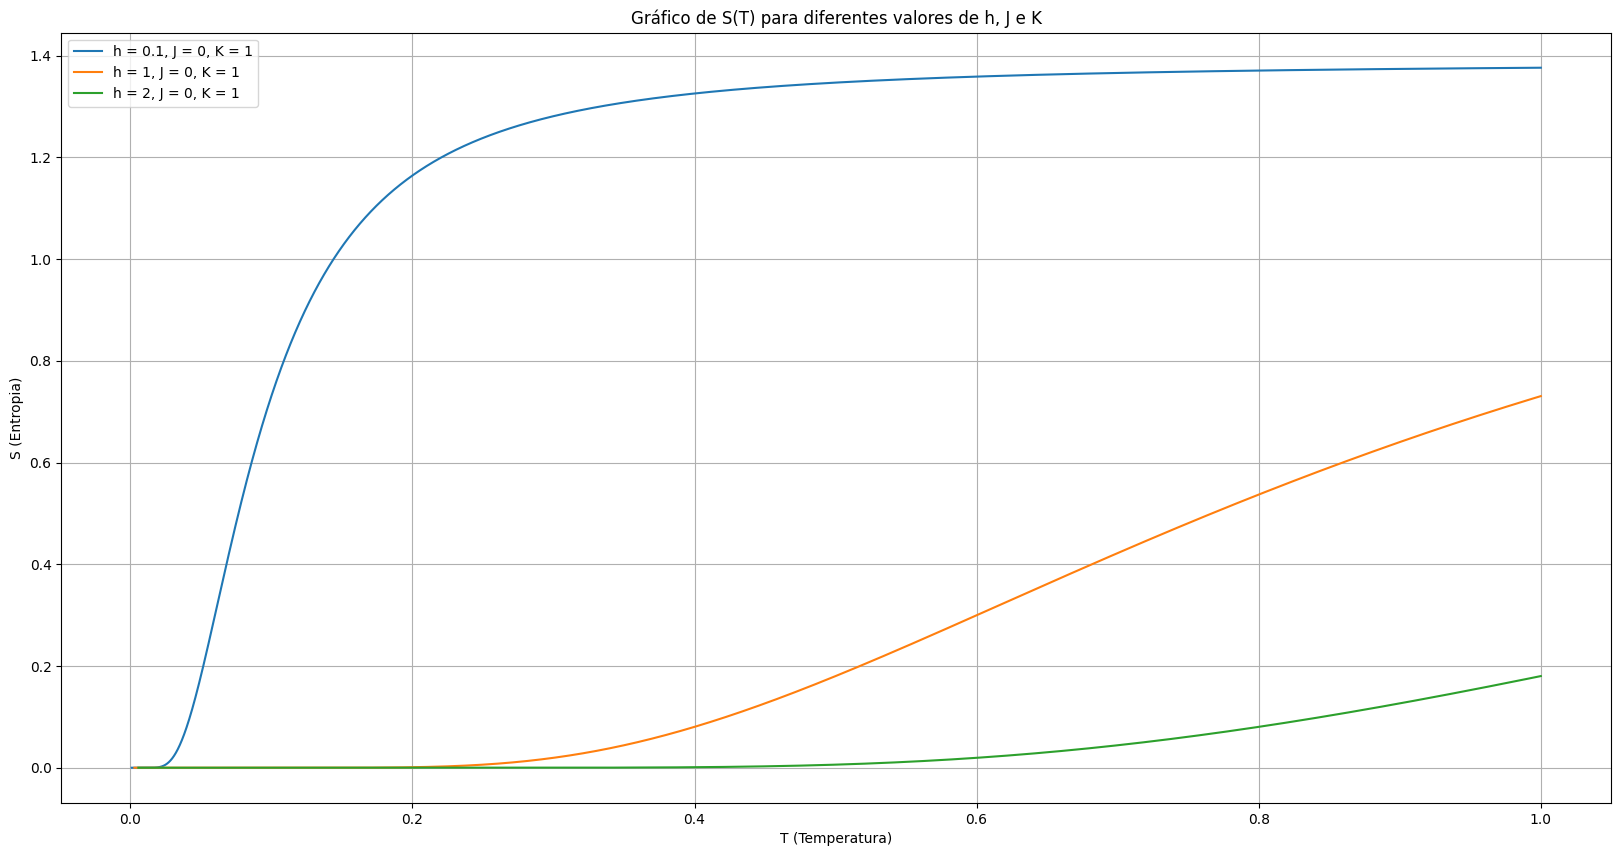

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função S(T)
def S(T, J, K, h):
    Z = 1 + np.exp(8 * J / (K * T)) + 2 * np.cosh(2 * h / (K * T))
    term1 = K * np.log(Z)
    numerator = 8 * J * np.exp(8 * J / (K * T)) + 4 * h * np.sinh(2 * h / (K * T))
    denominator = T * Z
    term2 = numerator / denominator
    return term1 - term2

# Definir os intervalos de T
T_values = np.linspace(0.001, 1, 10000)

# Definir os valores para h, K e J que serão usados nas plotagens
h_values = [0.1, 1, 2]
K_values = [1]
J_values = [0]

# Criar o gráfico
plt.figure(figsize=(20, 10))

# Loop para calcular S(T) para cada combinação de h, K e J e plotar os resultados
for h in h_values:
    for K in K_values:
        for J in J_values:
            S_values = S(T_values, J, K, h)
            plt.plot(T_values, S_values, label=f'h = {h}, J = {J}, K = {K}')

# Adicionar título e rótulos
plt.title('Gráfico de S(T) para diferentes valores de h, J e K')
plt.xlabel('T (Temperatura)')
plt.ylabel('S (Entropia)')

# Incluir a equação no gráfico (opcional)
equation_text = r'$S(T) = K \log\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right) - \frac{8J e^{\frac{8J}{KT}} + 4h \sinh\left(\frac{2h}{KT}\right)}{T\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right)}$'
#plt.text(6, 0.5, equation_text, fontsize=15, bbox=dict(facecolor='white', alpha=1))

# Exibir a grade, a legenda e o gráfico
plt.grid(True)
plt.legend()
plt.show()

Plotando T(h, J, S). com S contanste, pois queremos o processo adiabático


========== MAGNETIC FIELD = 1.000090000900009 ==========
Temperatures [[-3.53762208]] Magnetic Field [1.000090000900009]
Temperatures [[-3.53762208]] Magnetic Field [1.000090000900009] result[[5.47860235e-06]]
Temperatures [[-3.53762208]] Magnetic Field [1.000090000900009]
Temperatures [[-3.53762208]] Magnetic Field [1.000090000900009] result[[5.47860235e-06]]
Temperatures [[-3.53762208]] Magnetic Field [1.000090000900009]
Temperatures [[-3.53762208]] Magnetic Field [1.000090000900009] result[[5.47860235e-06]]
Temperatures [[-3.53762203]] Magnetic Field [1.000090000900009]
Temperatures [[-3.53762203]] Magnetic Field [1.000090000900009] result[[5.47587376e-06]]
Temperatures [[-3.53751624]] Magnetic Field [1.000090000900009]
Temperatures [[-3.53751624]] Magnetic Field [1.000090000900009] result[[-2.18944085e-10]]
Temperatures [[-3.53751624]] Magnetic Field [1.000090000900009]
Temperatures [[-3.53751624]] Magnetic Field [1.000090000900009] result[[8.82627305e-15]]
Final Result=[-3.5375162

C:\Users\bolar\AppData\Local\Temp\ipykernel_11536\1321628496.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


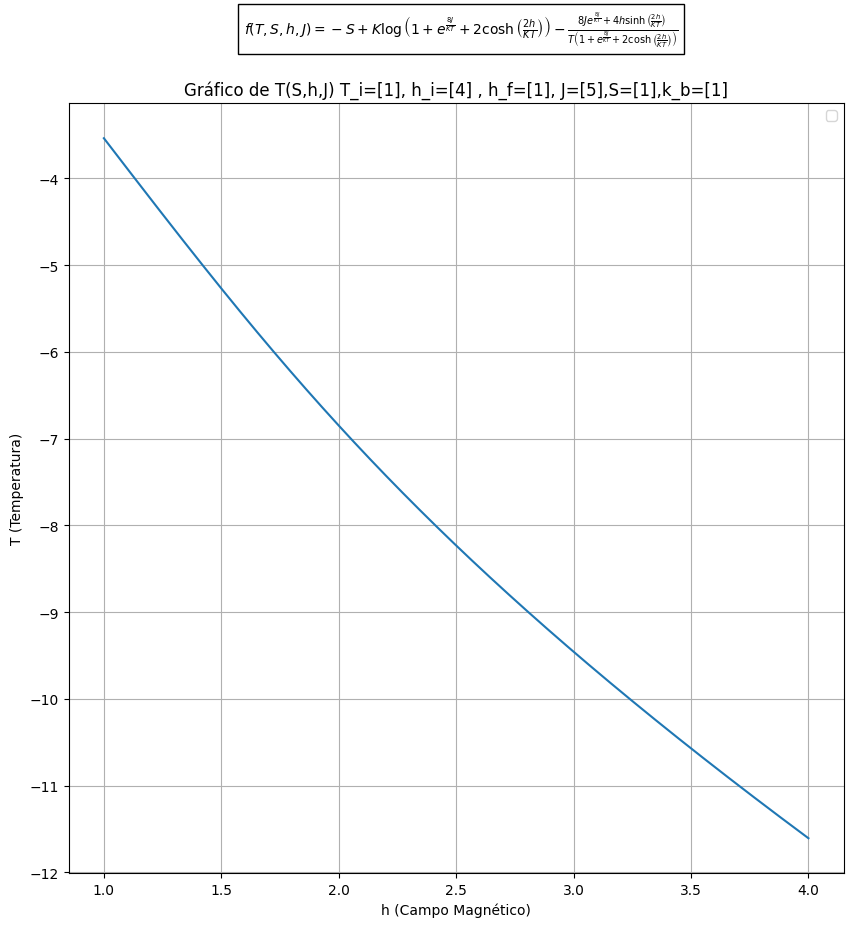

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os


#Definindo constantes
BOLTZMANN=1 # boltzmann constant -> Kb
ANTIFERROMAGNETIC_EXCHANGE_COUPLING= 5 #J>=0
ENTROPY=1 #S tem que ser constante pq o processo é adibático
TEMPERATURE_INITIAL_GUESS = 1 # melhorando o chute inicial para um valor maior
MAGNETIC_FIELD_INITIAL = 4 # O valor inicial do campo magnético
MAGNETIC_FIELD_FINAL = 1 #O valor final do campo magnético

def log_detailed_calculation(magnetic_field):
    return (magnetic_field > 1 and magnetic_field < 1.0001)


#definindo a função T(h), o único parâmetro é h pois é a única coisa que vai mudar de h_i até h_f
def Temp(temperature, magnetic_field):
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    Z = (                                                          
        1 + 
        np.exp(8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING / (BOLTZMANN * temperature)) + 
        (
            2 * 
            np.cosh(2 * magnetic_field / (BOLTZMANN * temperature))
        )
    )
    term1 = (ENTROPY * (-1)) + (BOLTZMANN * np.log(Z))
    numerator = (                
            (
                8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING * 
                np.exp(8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING / (BOLTZMANN * temperature))
            ) + 
            (
                4 * magnetic_field * 
                np.sinh(2 * magnetic_field / (BOLTZMANN * temperature))
            )
        )
    denominator = temperature * Z
    term2 =  numerator / denominator
    calculated_temperature = term1 - term2
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    return calculated_temperature


#definindo os intervalos de h
magnetic_fields = np.linspace(MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, 100_000)
temperatures = []
temperature_guess = TEMPERATURE_INITIAL_GUESS


for magnetic_field in magnetic_fields:
    if (log_detailed_calculation(magnetic_field)):
        print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
    try:
        calculated_temperature = fsolve(lambda temperature: Temp(temperature, magnetic_field), temperature_guess)
        if (log_detailed_calculation(magnetic_field)):
            print(f"Final Result={calculated_temperature}")
        
        #Update temperature guess with the result of previuos systems
        temperature_guess = calculated_temperature[0]
        
        #Append the system result to the list of temperatures to be plotted
        temperatures.append(calculated_temperature[0])  # Adiciona o valor encontrado para T
    except RuntimeWarning:
        temperatures.append(np.nan)  # Se houver erro, adiciona NaN para evitar falha
    if (log_detailed_calculation(magnetic_field)):
        print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")


plt.figure(figsize=(10,10))

# Incluir a equação no gráfico (opcional)
equation_text = r'$f(T,S,h,J) = -S + K \log\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right) - \frac{8J e^{\frac{8J}{KT}} + 4h \sinh\left(\frac{2h}{KT}\right)}{T\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right)}$'
plt.text(0.3, 0.95, equation_text, fontsize=10, bbox=dict(facecolor='white', alpha=1), clip_on=False, transform=plt.gcf().transFigure)


plt.plot(magnetic_fields, temperatures)

# Adicionar título e rótulos
plt.title(f"Gráfico de T(S,h,J) T_i=[{TEMPERATURE_INITIAL_GUESS}], h_i=[{MAGNETIC_FIELD_INITIAL}] , h_f=[{MAGNETIC_FIELD_FINAL}], J=[{ANTIFERROMAGNETIC_EXCHANGE_COUPLING}],S=[{ENTROPY}],k_b=[{BOLTZMANN}]")
plt.xlabel('h (Campo Magnético)')
plt.ylabel('T (Temperatura)')


# Exibir a grade, a legenda e o gráfico
plt.grid(True)
plt.legend()
plt.show()

 Autovalores: -J, -B, 0 e B

In [14]:
from sympy import symbols, diff
from sympy import *
import numpy as np
import sympy as sp

T = symbols('T') #temperatura
Ti = symbols('Ti') #temperatura inicial
Tf = symbols('Tf') #temperatura final
Tc = symbols('Tc') #temperatura fria
Th = symbols('Th') #temperatura quente

B = symbols('B', real=True, positive=True) #campo magnético
Bi = symbols('Bi', real=true, positive=True) #Campo magnético inicial
Bf =symbols('Bf', real=True, positive=True) #campo magnético final
K = symbols('K', real=True, positive=True) #Constante de boltzmann
J = symbols('J', real=True, positive=True) #Constante de troca antiferromagnética

Z = 1 + 2*sp.cosh(B/T) + sp.exp(J/T) #função de partição

print('Função de Partição:')
Z



Função de Partição:


exp(J/T) + 2*cosh(B/T) + 1

In [18]:
print('Energia Livre de Helmholtz:')
F = (-1)*(T) * sp.log(Z)
F

Energia Livre de Helmholtz:


-T*log(exp(J/T) + 2*cosh(B/T) + 1)

In [32]:
print('Energia média:')
U = ((T**2)) * (diff(sp.log(Z), T))  #Lembrando que U = -d/dβ log(Z) = T^2 d/dT log(Z)
print(U)
U

Energia média:
T**2*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1)


T**2*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1)

In [20]:
print('Entropia:')
S = (-1)*diff(F,T)  #Lembrando que S = -d/dt H 
S

Entropia:


T*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1) + log(exp(J/T) + 2*cosh(B/T) + 1)

In [21]:
print('Calor Específico:')
c = T*diff(S,T) ##Lembrando que c = T* d/dt S
c

Calor Específico:


T*(T*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)*(2*B*sinh(B/T)/T**2 + J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1)**2 + T*(2*B**2*cosh(B/T)/T**4 + 4*B*sinh(B/T)/T**3 + J**2*exp(J/T)/T**4 + 2*J*exp(J/T)/T**3)/(exp(J/T) + 2*cosh(B/T) + 1) + 2*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1))

In [22]:
print('Magnetização')
M = (-1)*diff(F,B) ##Lembrando que M = -d/dB H
M

Magnetização


2*sinh(B/T)/(exp(J/T) + 2*cosh(B/T) + 1)

In [23]:
print('Susceptibilidade:')
X = diff(M,B) ##Lembrando que X = d/dB M
X

Susceptibilidade:


2*cosh(B/T)/(T*(exp(J/T) + 2*cosh(B/T) + 1)) - 4*sinh(B/T)**2/(T*(exp(J/T) + 2*cosh(B/T) + 1)**2)

In [24]:
print(c)

T*(T*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)*(2*B*sinh(B/T)/T**2 + J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1)**2 + T*(2*B**2*cosh(B/T)/T**4 + 4*B*sinh(B/T)/T**3 + J**2*exp(J/T)/T**4 + 2*J*exp(J/T)/T**3)/(exp(J/T) + 2*cosh(B/T) + 1) + 2*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1))


In [25]:
c1 = T*T*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)*(2*B*sinh(B/T)/T**2 + J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1)**2
c2 = T*T*(2*B**2*cosh(B/T)/T**4 + 4*B*sinh(B/T)/T**3 + J**2*exp(J/T)/T**4 + 2*J*exp(J/T)/T**3)/(exp(J/T) + 2*cosh(B/T) + 1)
c3 = T* 2*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1)


In [ ]:
C1 = sp.integrate(c1, T)
C1

In [ ]:
C2 = sp.integrate(c2, T)

In [39]:
C3 = sp.integrate(c3, T)

In [ ]:
C = C1 + C2 + C3
C

Ainda não consegui chegar na solução simbolica da integral de Cv... por isso peguei o resultado disponibilizado no mathematica.... depois vou tentar fazer essas contas simbolicamente no mathematica e ver quais são os beneficio de usar as duas linguagem. :)

criei a função que gera a diferença entre $\Delta Q$ 

In [41]:
import sympy as sp

def integral_Cv(B,T):
        
    C = (((-1)*(J*sp.exp(J/T) + 2*B*sp.sinh(B/T)))/(1 + sp.exp(J/T) + 2*sp.cosh(B/T)))
    
    return C
#def W_ciclo(temperature_hot, temperature_cold):

Obter $Q_h$ e $Q_c$, calor quente e frio, são determinamos através da integral da capacidade térmica. Os limites intefeiores e superiores são respecitivamente de casa um dos processos.

$Q_h$  $(B \rightarrow C)$ : $(T_c, B_f) \rightarrow (T_h, B_f)$ 

e

$Q_c$ $(D \rightarrow A)$ : $(T_h, B_i) \rightarrow (T_c, B_i)$

In [67]:
def Q_hot(Th,Tc):
    Qh = integral_Cv(Bf, Th) - integral_Cv(Bf, Tc)
    return Qh

In [68]:
def Q_cold(Th, Tc): 
    Qc = integral_Cv(Bi,Tc) - integral_Cv(Bi,Th)
    return Qc

Criando a função Energia interna $U(J, B, T)$

In [44]:
def energia_Media(T, B):
    e = U(T, B)
    return e

Obter o Trabalho $W_1$ e $W_2$ em cada um dos processo adiabáticos é simplesmente fazer a variação da energia interna $\Delta U_i (J,T,B) = \Delta W_i$ em cada um dos processo adiabáticos.

O Trabalho do ciclos é obtido através de $W_{ciclo} = W_1 + W_2$. Onde,

$W_1 (C \rightarrow D):$ $(T_h, B_i) \rightarrow (T_h, B_i)$ :$W_{in}$

e

$W_2 (A \rightarrow B):$ $(T_c, B_i) \rightarrow (T_c, B_f)$ :$W_{out}$

In [45]:
def energia_Media(T, B):
    e = T**2*(-2*B*sinh(B/T)/T**2 - J*exp(J/T)/T**2)/(exp(J/T) + 2*cosh(B/T) + 1)
    return e



In [53]:
def W_1(Th, Tc):
    W1 = energia_Media(Th,Bf) - energia_Media(Th, Bi)
    return W1

In [60]:
def W_2(Th, Tc):
    W2 = energia_Media(Tc, Bf) - energia_Media(Tc, Bi)
    return W2 

In [62]:
def W_total(Th, Tc):
    W = W_1(Th,Tc) + W_2(Th, Tc)
    return W

Agora é tentar plotar $T_b$ X $T_a$

In [82]:
def define_region(temperature_hot, temperature_cold):
    W = W_total(temperature_hot, temperature_cold)
    Qh = Q_hot(temperature_hot, temperature_cold)
    Qc = Q_cold(temperature_hot, temperature_cold)
    Tb = temperature_cold
    Ta = temperature_hot

    if W > 0:
        return 1  # Maquina
    elif W < 0 and Qc < 0 and Qh > 0 and Tb < Ta:
        return 2  # Acelerador
    elif W < 0 and Qc > 0 and Qh < 0 and Tb > Ta:
        return 2  # Acelerador
    elif W < 0 and Qc > 0 and Tb < Ta:
        return 3  # Refrigerador
    elif W < 0 and Qh > 0 and Tb > Ta:
        return 3  # Refrigerador
    elif W < 0 and Qc < 0 and Qh < 0:
        return 4  # Aquecedor
    else:
        return 0  # Indefinido

# Plot the regions
def plot_regions(temperature_range_hot, temperature_range_cold, Resolution):
    Th = np.linspace(temperature_range_hot[0], temperature_range_hot[1], Resolution)
    Tc = np.linspace(temperature_range_cold[0], temperature_range_cold[1], Resolution)
    Th_grid, Tc_grid = np.meshgrid(Th, Tc)

    # Evaluate the region for each point
    region_grid = np.zeros_like(Th_grid, dtype=int)
    for i in range(Resolution):
        for j in range(Resolution):
            region_grid[i, j] = define_region(Th_grid[i, j], Tc_grid[i, j])


    ####
        # Adicionar os parâmetros no gráfico
    param_text = (
        f"$h_i = {Bi}$\n"
        f"$h_f = {Bf}$\n"
        f"$J = {J}$"
    )
    ####

    # Plot the regions (Tb on x-axis, Ta on y-axis)
    plt.figure(figsize=(10, 8))
    plt.contourf(Tc_grid, Th_grid, region_grid, levels=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5],
                 colors=['gray', 'red', 'blue', 'green', 'yellow'], alpha=0.6)
    plt.colorbar(ticks=[0, 1, 2, 3, 4],
                 format=plt.FixedFormatter(["Indefinido", "Maquina", "Acelerador", "Refrigerador", "Aquecedor"]))
    plt.text(1, 9, param_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    plt.xlabel("Temperatura Tb")
    plt.ylabel("Temperatura Ta")
    plt.title("Regiões: Máquina, Acelerador, Refrigerador, Aquecedor")
    plt.grid(True)
    plt.show()

In [ ]:
# Constantes
J= 0  # J >= 0
Bi = 4  # Campo Magnético Inicial
Bf = 1  # Campo Magnético Final
Resolution = 10000 #Resolução do print

# Definindo o range das temperaturas
temperature_range_hot = (0.1, 20000)  # Range da Ta (hot temperature)
temperature_range_cold = (0.1, 20000)  # Range da Tb (cold temperature)

# Plot the regions
plot_regions(temperature_range_hot, temperature_range_cold, Resolution)

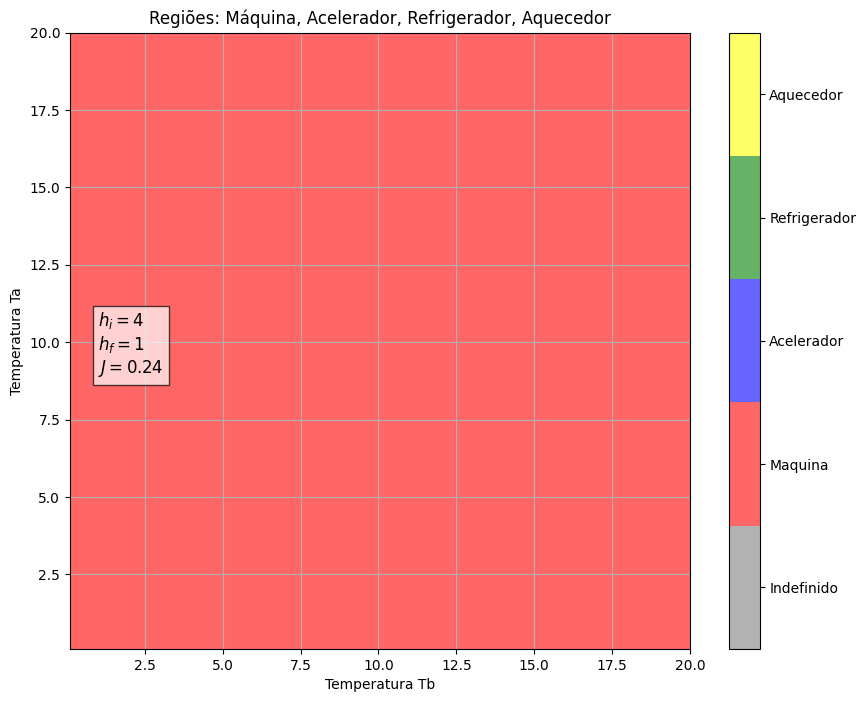

In [ ]:
# Constantes
J = 0.24  # J >= 0
Bi = 4  # Campo Magnético Inicial
Bf = 1  # Campo Magnético Final
Resolution = 10000 #Resolução do print

# Definindo o range das temperaturas
temperature_range_hot = (0.1, 20000)  # Range da Ta (hot temperature)
temperature_range_cold = (0.1, 20000)  # Range da Tb (cold temperature)

# Plot the regions
plot_regions(temperature_range_hot, temperature_range_cold, Resolution)

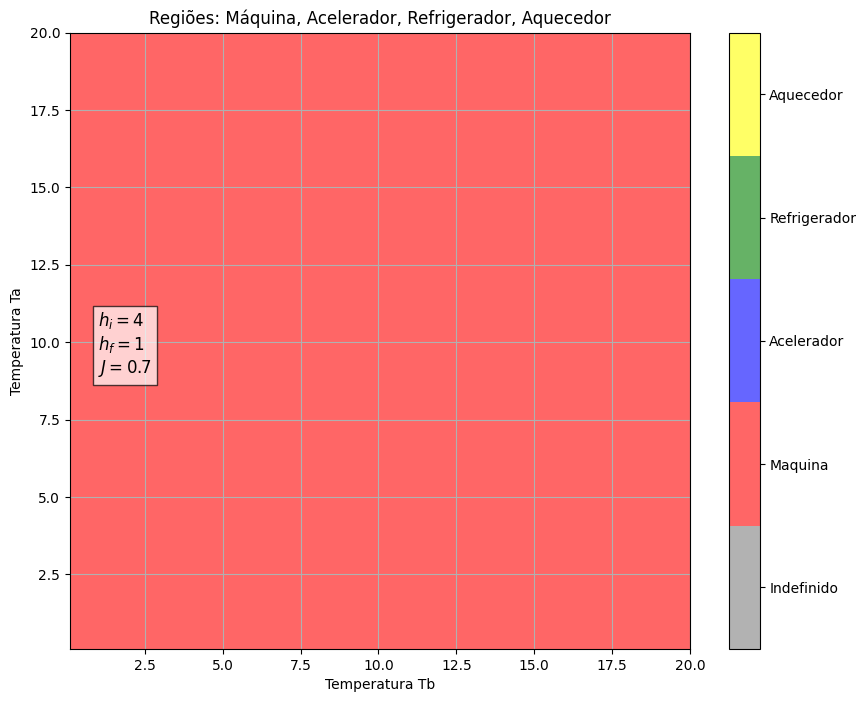

In [94]:
# Constantes
J = 0.7  # J >= 0
Bi = 4  # Campo Magnético Inicial
Bf = 1  # Campo Magnético Final
Resolution = 100000 #Resolução do print

# Definindo o range das temperaturas
temperature_range_hot = (0.1, 20000)  # Range da Ta (hot temperature)
temperature_range_cold = (0.1, 20000)  # Range da Tb (cold temperature)

# Plot the regions
plot_regions(temperature_range_hot, temperature_range_cold, Resolution)

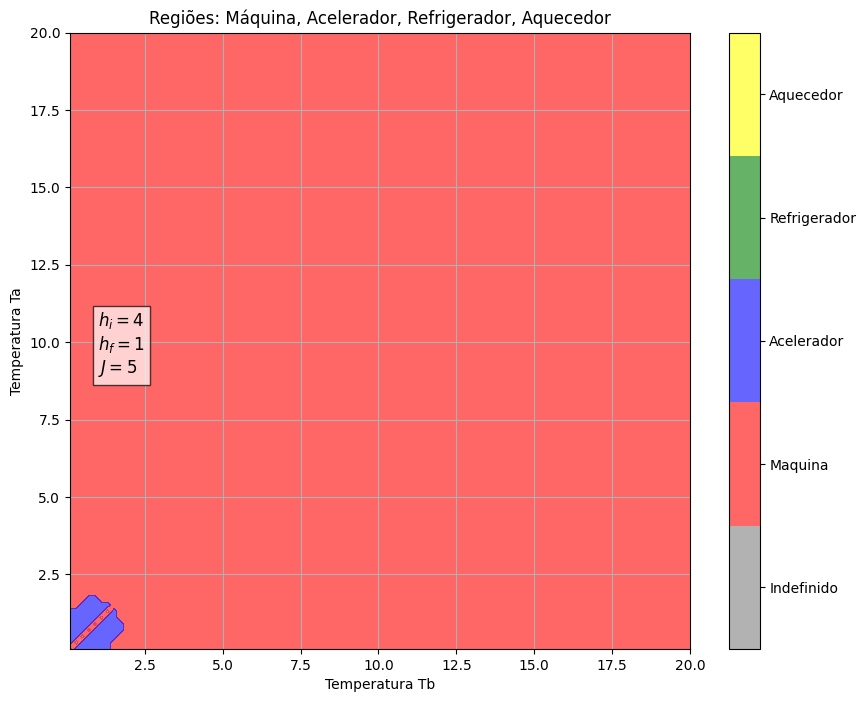

In [95]:
# Constantes
J = 5  # J >= 0
Bi = 4  # Campo Magnético Inicial
Bf = 1  # Campo Magnético Final
Resolution = 100 #Resolução do print

# Definindo o range das temperaturas
temperature_range_hot = (0.1, 20)  # Range da Ta (hot temperature)
temperature_range_cold = (0.1, 20)  # Range da Tb (cold temperature)

# Plot the regions
plot_regions(temperature_range_hot, temperature_range_cold, Resolution)